In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt


In [67]:
U, Tryk, Temp = np.genfromtxt('Usikkerheder.csv',delimiter=',', skip_header = 1,usecols=(0,1,2),unpack = True)

U_farmer = np.var(U*10**-12) #[C]

T = np.mean(Temp[0:3])
P_hPa = np.mean(Tryk[0:3])
P = P_hPa/10
print(T,P)



24.366666666666664 101.26333333333334


[1856. 1842. 1839. 1813. 1810. 1784. 1778. 1759. 1751. 1730. 1721. 1694.
 1688. 1665. 1632. 1584. 1555. 1506. 1476. 1433. 1404. 1360. 1332. 1290.
 1261. 1220. 1161. 1094. 1043.  978.  926.]


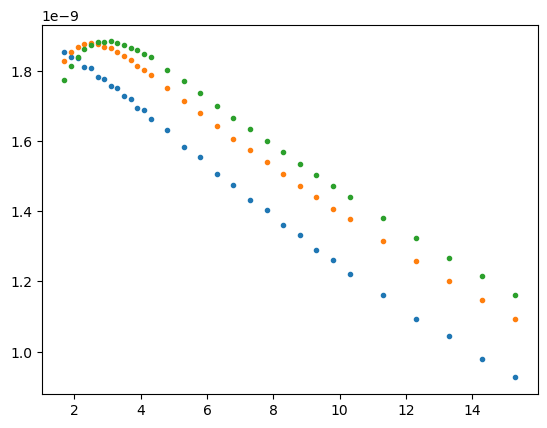

In [ ]:
l_6,data_6 = np.genfromtxt('data_6V.csv',delimiter=',', skip_header = 2,usecols=(3,4),unpack = True)
l_10,data_10 = np.genfromtxt('data_10V.csv',delimiter=',', skip_header = 2,usecols=(3,4), unpack = True)
l_15,data_15 = np.genfromtxt('data_15V.csv',delimiter=',', skip_header = 2,usecols=(3,4), unpack = True)

m_6 = data_6 *10**-12
m_10 = data_10 *10**-12
m_15 = data_15 *10**-12

plt.plot(l_6,m_6, '.')
plt.plot(l_10,m_10, '.')
plt.plot(l_15,m_15, '.')


In [73]:
# Konstanter til omregning til grey 
NDWQ0 = 5.3487* 10**7 #[Gy/C]
k_elektrometer = 0.9993
k_QQ0 = 0.991
k_pol = 1.0001
k_s = 1.0026
T_0 = 20 #grader
p_0 = 101.3 #[kPa]

U_baro = 1/10 #[kPa]
U_termo = 0.06 #[grader]
U_x = 0.001 #[cm]



In [57]:
k_tp = ((273.2 + T)*p_0)/((273.2+T_0)*P)
print(k_tp)

U_k_tp = np.sqrt((p_0/((273.2+T_0)*P)*U_termo)**2+(-((273.2 + T)*p_0)/((273.2+T_0)*P**2)*U_baro)**2)
print(U_k_tp)

U_D6 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_6*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)
U_D10 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_10*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)
U_D15 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_15*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)


1.0152606181650488
0.0010232805005986664


(0.095, 0.105)

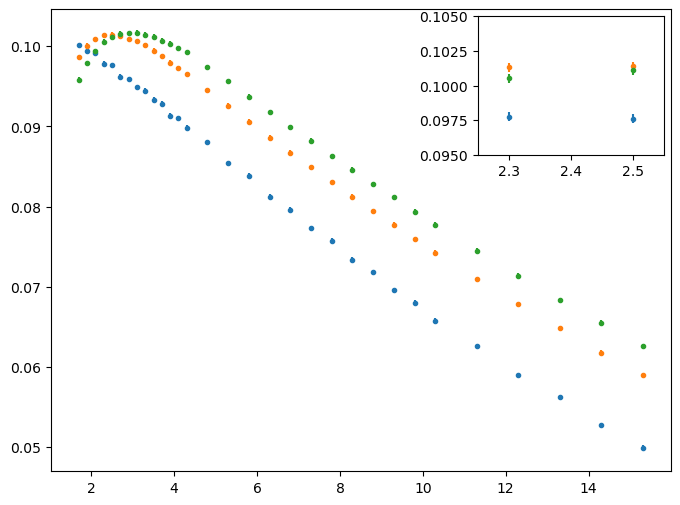

In [74]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

D_6 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_6
D_10 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_10
D_15 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_15

fig, ax = plt.subplots(figsize = (8,6))


ax.errorbar(l_6,D_6,yerr = U_D6,fmt = '.')
ax.errorbar(l_10,D_10,yerr = U_D10,fmt = '.')
ax.errorbar(l_15,D_15,yerr = U_D15,fmt = '.')

ax_inset = inset_axes(ax, width = "30%", height = "30%", loc = "upper right")
ax_inset.errorbar(l_6,D_6,yerr = U_D6, xerr = U_x,fmt = '.')
ax_inset.errorbar(l_10,D_10,yerr = U_D10, xerr = U_x ,fmt = '.')
ax_inset.errorbar(l_15,D_15,yerr = U_D15, xerr = U_x,fmt = '.')
ax_inset.set_xlim(2.25,2.55)
ax_inset.set_ylim(0.095,0.105)




(0.0, 20.0)

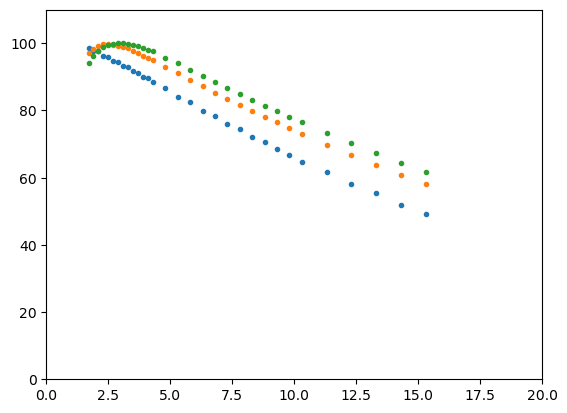

In [47]:
max_D = np.max(D_15)
Dp_6 = D_6/max_D * 100
Dp_10 = D_10/max_D *100
Dp_15 = D_15/max_D *100

plt.plot(l_6,Dp_6, '.')
plt.plot(l_10,Dp_10, '.')
plt.plot(l_15,Dp_15, '.')
plt.ylim([0,110])
plt.xlim([0,20])
